In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report , accuracy_score
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore')

In [2]:
company=pd.read_csv("company_data.csv")
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)

In [4]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')

In [5]:
company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
High              int64
dtype: object

In [6]:
company['ShelveLoc']=company['ShelveLoc'].cat.codes
company['Urban']=company['Urban'].cat.codes
company['US']=company['US'].cat.codes

In [7]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


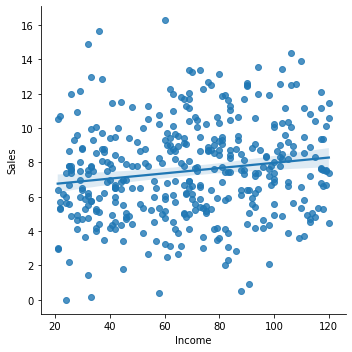

In [8]:
sns.lmplot(x='Income', y='Sales', data=company)

<Figure size 1440x1440 with 0 Axes>

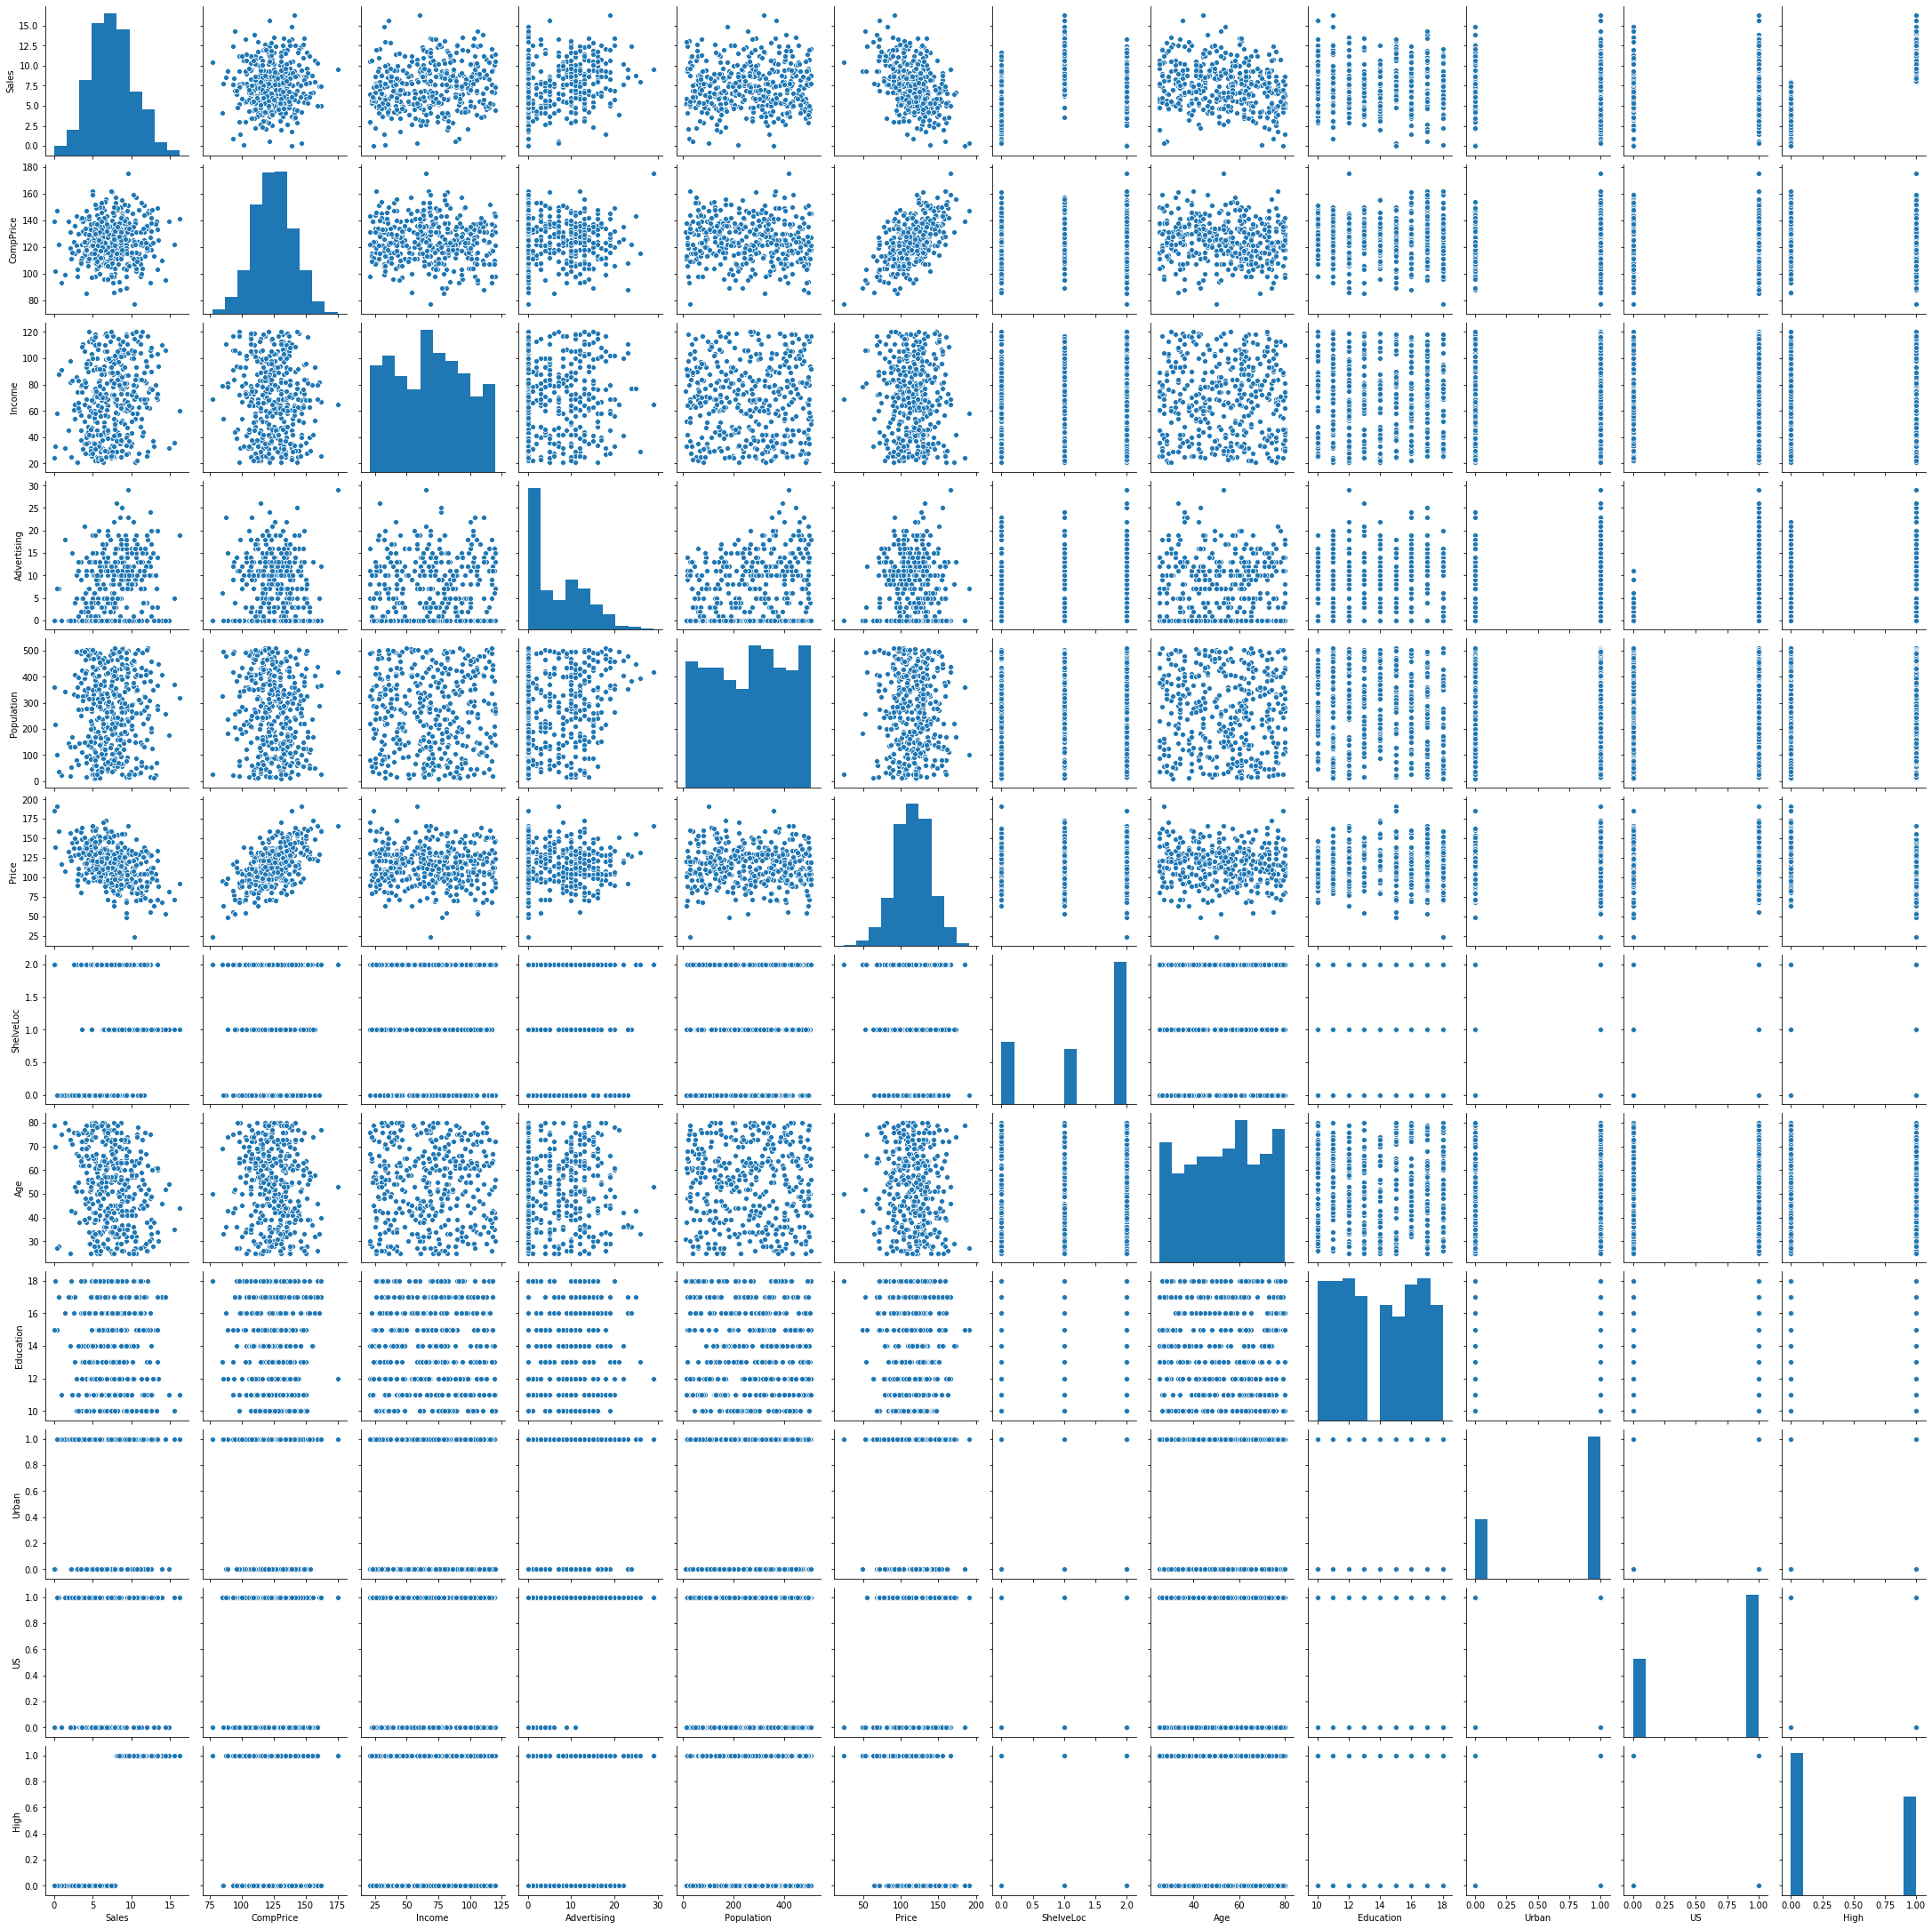

In [9]:
plt.figure(figsize=(20 , 20 ))
sns.pairplot(company)

In [10]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
x = company[feature_cols]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [11]:
y = company.High
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
x_train

array([[ 0.80747051,  1.34718373,  0.50284783, ...,  0.04306425,
         0.65985354,  0.76635604],
       [-0.37901677,  0.73087255,  0.50284783, ..., -0.3484289 ,
         0.65985354,  0.76635604],
       [ 0.80747051,  1.78222692, -0.23808709, ..., -1.52290834,
         0.65985354,  0.76635604],
       ...,
       [ 1.33479818, -0.53800341, -0.979022  , ..., -0.73992205,
         0.65985354, -1.30487651],
       [ 0.08239495,  1.09340854, -0.979022  , ...,  0.82605054,
         0.65985354, -1.30487651],
       [-1.36775616,  1.23842294,  0.94740878, ...,  0.82605054,
         0.65985354,  0.76635604]])

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
accuracy_score(y_pred , y_test)

0.75

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
cm

array([[49,  6],
       [19, 26]], dtype=int64)

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier_1 = RandomForestClassifier(n_estimators=100, criterion='gini'  , random_state = 0 )
classifier_1.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
classifier_1.score(x_test, y_test)

0.71

In [26]:
y_pred_1 = classifier_1.predict(x_test)

In [27]:
accuracy_score(y_pred_1 , y_test)

0.71

In [28]:
cm_1  = confusion_matrix(y_test, y_pred_1)
cm_1

array([[48,  7],
       [22, 23]], dtype=int64)